In [1]:
import os
import glob
import numpy as np
import random
import matplotlib.pyplot as plt
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.models as models
import torchvision.transforms as transforms
from torchvision.models.feature_extraction import get_graph_node_names
from torchvision.models.feature_extraction import create_feature_extractor
from torch.utils.data import TensorDataset, DataLoader, Dataset
import torch.nn.functional as F



from FileReader import get_picture_tensors
from ModelEvaluation import eval_model

from CatNet.datasets import OrderedDataSet, SiameseDataset
from CatNet.models import CatNet, SiameseNetwork
from CatNet.losses import ContrastiveLoss

In [155]:
n_classes = 32

# model = FeatureExtractionCNN(n_classes)
# based_model = CatNet(n_classes, output_layer = 'f')
# based_model = CatNet(n_classes, output_layer = 'ff')
# based_model = CatNet(n_classes, output_layer = 'f_ff')
# based_model = CatNet(128, output_layer = 'n')





# classifieur = nn.Sequential(
#     nn.Dropout(p=0.5, inplace=False),
#     nn.Linear(512, 128),
#     # nn.BatchNorm1d(128),
#     # nn.ReLU(inplace=True)
# )



# classifieur = nn.Sequential(
#     # nn.Dropout(p=0.5, inplace=False),
#     nn.Linear(512, 128),
#     nn.ReLU(inplace=True),
#     # nn.BatchNorm1d(128),
#     nn.Linear(128, 128),
#     nn.ReLU(inplace=True),
# )

# classifieur = nn.Sequential(
#     # nn.Dropout(p=0.5, inplace=False),
#     nn.MaxPool1d(kernel_size = 2, stride = 2),
#     nn.Linear(256, 256),
#     nn.ReLU(inplace=True),
#     # nn.MaxPool1d(kernel_size = 2, stride = 2),
#     nn.Linear(256, 128),
#     nn.ReLU(inplace=True),
#     # # nn.BatchNorm1d(128),
#     # nn.Linear(128, 128),
#     # nn.ReLU(inplace=True),
# )


# classifieur = nn.Sequential(
#     nn.Dropout(p=0.5, inplace=False),
#     nn.Linear(512, 512),
#     # nn.ReLU(inplace=True),
# #     # nn.Sigmoid(),
# #     nn.Tanh(),
# #     # nn.BatchNorm1d(512),
# #     nn.Linear(512, 128),
# #     nn.ReLU(inplace=True),
# # )

# classifieur = nn.Sequential(
#     nn.Dropout(p=0.5),
#     nn.Linear(9216, 4096),
#     nn.ReLU(inplace=True),
#     nn.Dropout(p=0.5),
#     nn.Linear(4096, 1024),
#     nn.ReLU(inplace=True),
#     nn.Linear(1024, 128),
# )


# # classification_layers = nn.Sequential(nn.Linear(9216, 100),
# #                                         nn.ReLU(inplace=True),
# #                                         nn.BatchNorm1d(100),
# #                                         nn.Linear(100, 100),
# #                                         nn.ReLU(inplace=True),
# #                                         nn.BatchNorm1d(100),
# #                                         nn.Linear(100, num_classes)
# #                                     )

# # classification_layers = nn.Sequential(nn.Linear(9216, 100),
# #                                         nn.ReLU(inplace=True),
# #                                         nn.BatchNorm1d(100),
# #                                         nn.Linear(100, 100),
# #                                         nn.ReLU(inplace=True),
# #                                         nn.BatchNorm1d(100),
# #                                         nn.Linear(100, num_classes)
# #                                     )

# based_model = CatNet(cnn_backbone = 'alexnet', classifier = classifieur)
# # based_model = CatNet(cnn_backbone = 'resnet18')#, classifier = classifieur)
# # based_model = CatNet(cnn_backbone = 'vgg19')#, classifier = classifieur)
# # based_model.load_parameters_from_file('resnet_512_to_128.pth')

# # based_model.summary()





classifieur = nn.Sequential(
    nn.Dropout(p=0.5),
    # nn.Linear(9216, 4096),
    nn.Linear(9216, 1024),
    # nn.ReLU(inplace=True),
    # nn.Dropout(p=0.5),
    # nn.Linear(4096, 1024),
    # nn.ReLU(inplace=True),
    # nn.Linear(1024, 128),
)

# based_model = CatNet(cnn_backbone = 'alexnet', freeze_all_layer = False)
based_model = CatNet(cnn_backbone = 'alexnet', freeze_all_layer = False, classifier = classifieur)


# based_model.summary()


model = SiameseNetwork(based_model)

loss_at_each_epoch = []
loss_at_each_epoch_label0 = []
loss_at_each_epoch_label1 = []

End of epoch 0
Total loss in epoch:  8818.064697265625
Average loss (same) in epoch:  6594.17236328125
Average loss (diff) in epoch:  8816.750244140625


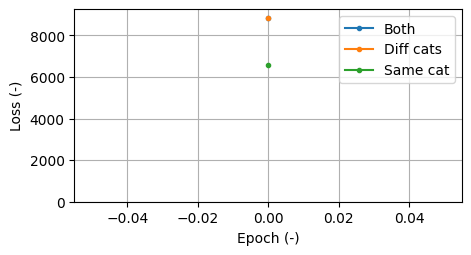

End of epoch 1
Total loss in epoch:  8057.768310546875
Average loss (same) in epoch:  2164.333709716797
Average loss (diff) in epoch:  16787.820556640625


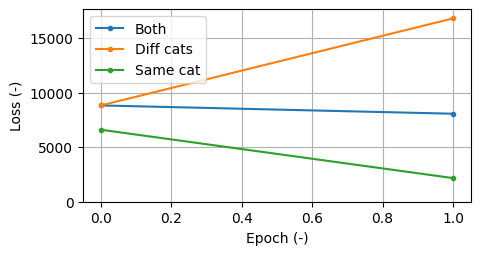

End of epoch 2
Total loss in epoch:  7845.4249267578125
Average loss (same) in epoch:  2825.2022705078125
Average loss (diff) in epoch:  16010.76611328125


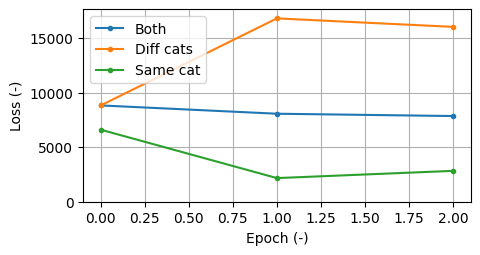

End of epoch 3
Total loss in epoch:  7650.083740234375
Average loss (same) in epoch:  4863.565673828125
Average loss (diff) in epoch:  11734.6650390625


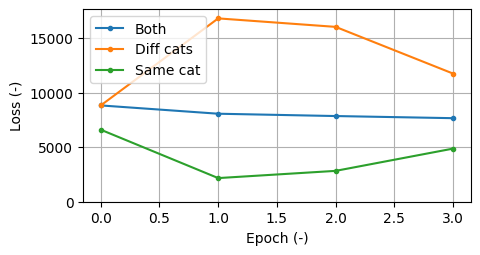

End of epoch 4
Total loss in epoch:  7738.85693359375
Average loss (same) in epoch:  5889.4354248046875
Average loss (diff) in epoch:  10444.13916015625


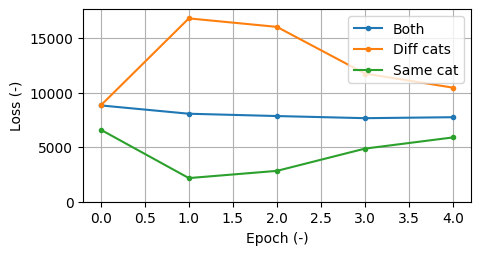

End of epoch 5
Total loss in epoch:  7614.166748046875
Average loss (same) in epoch:  4542.773193359375
Average loss (diff) in epoch:  12435.556396484375


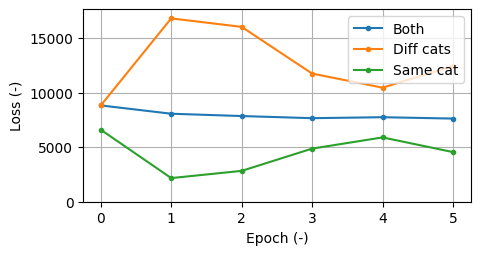

End of epoch 6
Total loss in epoch:  7642.597412109375
Average loss (same) in epoch:  3718.0640258789062
Average loss (diff) in epoch:  13400.318603515625


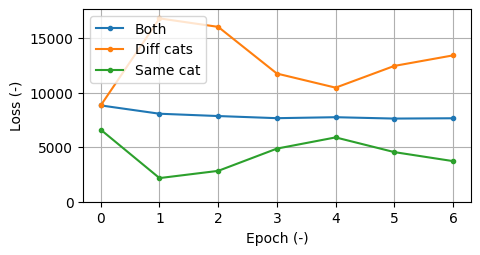

End of epoch 7
Total loss in epoch:  7674.3209228515625
Average loss (same) in epoch:  3543.0021362304688
Average loss (diff) in epoch:  13033.37939453125


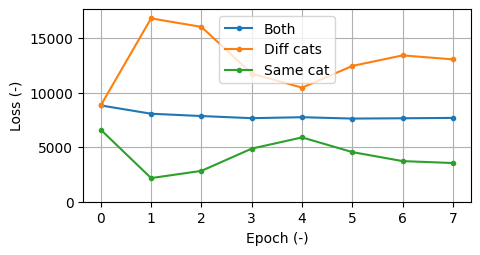

End of epoch 8
Total loss in epoch:  7620.473876953125
Average loss (same) in epoch:  4597.012023925781
Average loss (diff) in epoch:  12343.934326171875


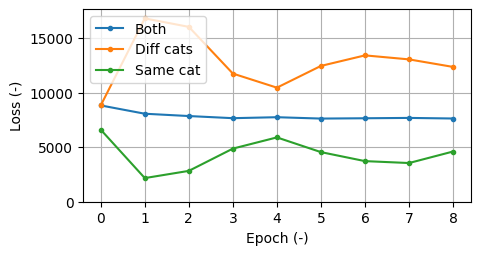

End of epoch 9
Total loss in epoch:  7638.159912109375
Average loss (same) in epoch:  4893.5758056640625
Average loss (diff) in epoch:  11489.7021484375


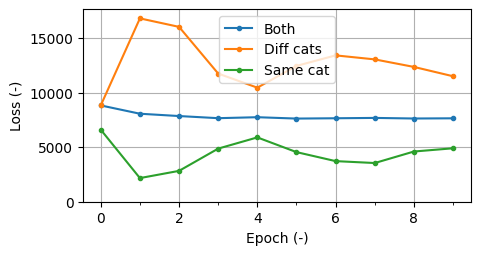

KeyboardInterrupt: 

In [156]:

# data params
# root_directory = "normal_prep_datasets/dataset_chat_downscale/"
root_directory = "normal_prep_datasets/dataset_chat_downscale_no_background/"

required_train_imgs = 10
required_test_imgs = 1

num_epochs = 25
# batches_per_epoch = 8
batches_per_epoch = 64

# batch_size = 8
batch_size = 8

# learning_rate = 1e-5
learning_rate = 1e-4
# learning_rate = 1e-3
# learning_rate = 1e-2
# learning_rate = 1e-6

# ratio = [0.75, 0.25]
ratio = 0.7

model.train()

# criterion = ContrastiveLoss_old()
# criterion = ContrastiveLoss_old(margin = 300)
# criterion = ContrastiveLoss_old(margin = 18) # alexnet pas pire
# criterion = ContrastiveLoss_old(margin = 8)
# criterion = ContrastiveLoss_old(margin = 0.75)
# criterion = ContrastiveLoss_old(margin = 0.3)


# criterion = ContrastiveLoss(margin = 8)
# criterion = ContrastiveLoss(margin = 0.75)
# criterion = ContrastiveLoss(margin = 20)
# criterion = ContrastiveLoss(margin = 45)
# criterion = ContrastiveLoss(margin = 5)
# criterion = ContrastiveLoss(margin = 2)
criterion = ContrastiveLoss(margin = 90)

params = filter(lambda x: x.requires_grad, model.parameters())
optimizer = optim.Adam(params, lr = learning_rate)

# # Gossage sur les params potentiel
# momentum = 0.5
# optimizer = optim.SGD(params, lr = learning_rate, momentum = momentum)   





for epoch in range(num_epochs):

    (train_images, val_images, test_images, 
    train_labels , val_labels , test_labels , n_classes) = get_picture_tensors(root_directory=root_directory,
                                                                n_classes=n_classes, 
                                                                required_train_imgs=required_train_imgs, 
                                                                required_test_imgs=required_test_imgs,
                                                                use_selected_eval_datasets = False,
                                                                shuffle_directories = True,
                                                                shuffle_images = True, 
                                                                show_progress=False,
                                                                ordered_dataset=True)

    train_ordered_dataset = OrderedDataSet(train_images)
    train_siamese_dataset = SiameseDataset(train_ordered_dataset, ratio, batch_size = batch_size)
    train_dataloader = DataLoader(train_siamese_dataset, batch_size = batch_size, shuffle=True)



    total_loss = 0
    
    # n_label0 = 0
    total_loss_label0 = 0
    # n_label1 = 0
    total_loss_label1 = 0
    
    for imgs_1, imgs_2, labels in train_dataloader:

        optimizer.zero_grad()

        output1, output2 = model(imgs_1, imgs_2)

        loss_label0 = criterion(output1[labels == False], output2[labels == False], labels[labels == False])
        loss_label1 = criterion(output1[labels == True], output2[labels == True], labels[labels == True])

        loss = criterion(output1, output2, labels)

        total_loss += loss.detach().numpy()
        total_loss_label0 += loss_label0.detach().numpy()
        total_loss_label1 += loss_label1.detach().numpy()

        loss.backward()
        optimizer.step()

    print(f"End of epoch {epoch}")
    print("Total loss in epoch: ", total_loss)
    print("Average loss (same) in epoch: ", total_loss_label1)
    print("Average loss (diff) in epoch: ", total_loss_label0)

    loss_at_each_epoch.append(total_loss)
    loss_at_each_epoch_label0.append(total_loss_label0)
    loss_at_each_epoch_label1.append(total_loss_label1)



    maxtot = max([max(loss_at_each_epoch), max(loss_at_each_epoch_label0), max(loss_at_each_epoch_label1)])
    # maxtot = max(loss_at_each_epoch)

    from matplotlib.ticker import MultipleLocator

    fig, ax = plt.subplots(1, 1, figsize=(5, 2.5))

    ax.set_xlabel('Epoch (-)')
    # ax.set_ylabel('Validation accuracy (%)')
    ax.set_ylabel('Loss (-)')
    # ax.set_ylim(0, 100)
    # ax.set_ylim(0, 7500)
    ax.set_ylim(0, 1.05*maxtot)
    # ax.set_yticks(np.arange(0, 110, 10))
    ax.xaxis.set_minor_locator(MultipleLocator(1))

    ax.plot(loss_at_each_epoch, '.-', label='Both')
    ax.plot(loss_at_each_epoch_label0, '.-', label='Diff cats')
    ax.plot(loss_at_each_epoch_label1, '.-', label='Same cat')

    # ax.legend(loc='upper right')
    ax.legend(loc='best')

    plt.grid(True)
    plt.show()


In [ ]:


based_model.save_parameters_to_file('resnet_512_to_128_BATCH_2layer_minSame.pth')


